<img src = "images/logos.png" align = "center">
<br>
<h1 align=center><font size = 5>Régression linéaire</font></h1>

## Plan du notebook

1. Exploration du jeu de données
    - Chargement des données
    - Visualisation des données
2. Modèle de régression linéaire univariée
    - Les mathématiques de la régression linéaire
    - Contruction d'un modèle de regréssion linéaire
    - Utilisation du modèle en prediction
    - Importance de l'echele des valeurs en regression
3. Regression multivariée
    - Visualiser le jeu de données (partie 2)
    - Ajout de nouvelles variables au modèle
4. Choisir le bon modèle
    - Métriques d'évaluation pour la régression
    - Comparaison des modèles avec train/test split et RMSE
5. Création et gestion des variables
    - Gestion des variables catégoriques
    - Feature engineering

## 1. Exploration du jeu de données

Le jeu de données servant au support de ce notebook est utilisé dans les compétitions Kaggle et correspond à l'étude des fréquences d'utilisation des velos de la société Capital bikeshare en libre service à Washington.([plus d'infos](https://www.kaggle.com/c/bike-sharing-demand/data)).

### Chargement des données

In [3]:
# importer les données dans un dataframe en indexant par la date
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikeshare = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [4]:
bikeshare.head(20)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8


**Questions:**

- Que représente chaque observation/ligne ?
- Quelle est est la colonne cible ?
- Combien de caractéristiques sont utilisées ?

In [5]:
# Il est judicieux d'éviter de nommer les colonnes par des mots clés.
# C'est le cas de la colonne count : nom d'une méthode. Renommer la colonne en 'total'
bikeshare.rename(columns={'count':'total'}, inplace=True)

### Visualisation des données

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

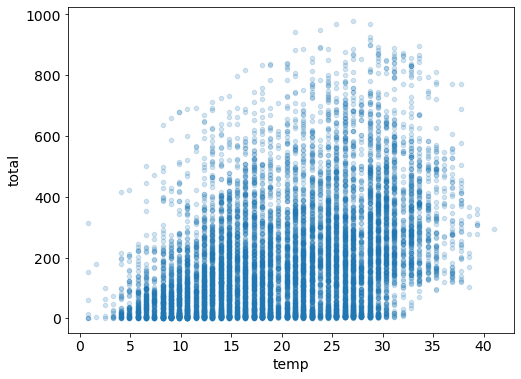

In [7]:
# Nuage de points cible en fonction de la température
bikeshare.plot(kind='scatter', x='temp', y='total', alpha=0.2)

In [ ]:
# Le nuage de point peut être amélioré par l'ajout d'une droite de regression avec Seaborn
import seaborn as sns
sns.lmplot(x='temp', y='total', data=bikeshare, aspect=1.5, scatter_kws={'alpha':0.2})

## 2. Modèle de régression linéaire univariée

### Les mathématiques de la régression linéaire

L'expression recherchée peut s'écrire :

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ est la valeur cible
- $\beta_0$ iest l'ordonnée à l'origine
- $\beta_1$ est le coefficient associé à la caractéristique $x_1$ (1ère colonne)
- $\beta_n$ est le coefficient associé à $x_n$ (nième colonne)

Les valeurs $\beta$ sont appelées **coefficients du modèle**:

- Ces valeurs sont éstimée ou "apprises" pendant la phase d'apprentissage en utilisant la **méthode des moindres carrés**
- Plus précisément, il s'agit de trouver l'équation de la droite qui soit la plus proche possible de tous les points. Pour cela on cherchera à minimiser la **somme des carrés des erreurs**.
- une fois établie, l'équation permettra de calculer des prédictions sur la valeur cible.

![Méthode des moindres carrés](images/estimating_coefficients.png)

Dans le schéma ci-dessus:

- Les points noirs représentent les **observations** des x et des y.
- Les points bleus proviennet de droite obtenue par **les moindres carrés**.
- Les lignes rouges sont les erreurs comises et qui sont donc les **écarts** entre les valeurs observées et les valeurs calculées par l'équation.

### Construction du modèle de régression linéaire

In [ ]:
# creation de la matrice X et du vecteur y
# Selection des caractéristiques 
caract = ['temp']
X = bikeshare[caract]
y = bikeshare.total

In [ ]:
# import, instantiation et application
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

In [ ]:
# affichage des coefficients
print(linreg.intercept_)
print(linreg.coef_)

Interpretation des résultats

**L'ordonnée à l'origine : intercept  ($\beta_0$):**

- C'est la valeur de la cible $y$ quand $x$=0.
- Ce serait le nombre de locations lorsque la température vaut 0 degrés Celsius.
- **Remarque:** L'ordonnée à l'origine n'est pas toujours une valeur porteuse de sens.

**Le coefficient du modèle associé à la caractéristique "temp" ($\beta_1$):**

- Mathématiquement, il s'agit de la pente de la droite ou encore le rapport d'un accroissement  de $y$ par l'accroissement associé de $x$.
- Dans la pratique on dira qu'une augmentation de la température de 1 degré est **assocée à** une augmentation de 9.17 locations de vélos.
- Il n'y a pas de liens de causalité !
- $\beta_1$ serait **negatif** si le nombre de locations diminuait lorsue la température augmente.

### Utilisation du modèle en prédiction

Combien de locations peut on prédire si la température vaut 25 degrés Celsius?

In [ ]:
# Calcul manuel
linreg.intercept_ + linreg.coef_*25

In [ ]:
# en utilisant la méthode `predict` du modèle
linreg.predict([[25]])

### Importance de l'echele des valeurs en regression?

Voyons ce qui se passe si la température était mesurée en Fahrenheit !

In [ ]:
# créer une nouvelle colonne de température en Fahrenheit (temp_F= temp*1.8 + 32)
bikeshare['temp_F'] = bikeshare.temp * 1.8 + 32
bikeshare.head()

In [ ]:
# Afficher le nuage de points avec  Seaborn y en fonction de temp_F
sns.lmplot(x='temp_F', y='total', data=bikeshare, aspect=1.5, scatter_kws={'alpha':0.2})

In [ ]:
# creation de la matrice X et du vecteur y
caract = ['temp_F']
X = bikeshare[caract]
y = bikeshare.total

# instantiation et application
linreg = LinearRegression()
linreg.fit(X, y)

# affichage des coefficients
print(linreg.intercept_
print(linreg.coef_

In [ ]:
# conversion de 25 degrés Celsius en Fahrenheit
25 * 1.8 + 32

In [ ]:
# prediction des locations pour 77 degrés Fahrenheit
linreg.predict([[77]])

**Conclusion:** L'échélle des caractéristiques n'affecte pas la régression linéaire. Ce sont les coefficients qui sont modifiés et leur interprétation.

In [ ]:
# Supprimer la colonne temp_F
bikeshare.drop('temp_F', axis=1, inplace=True)

## 3. Regression multivariée

### Visualiser le jeu des données (partie 2)

In [ ]:
# exploration de caractéristiques suppémentaires
caract = ['temp', 'weather', 'humidity','windspeed']

In [ ]:
# Nuages de points multiple avec Seaborn
sns.pairplot(bikeshare, x_vars=caract, y_vars='total', kind='reg')

Quelles remarques peut-on faire à propos de ces graphiques ?

In [ ]:
# Matrice de correlation
bikeshare.corr()

In [ ]:
# Matrice de correlation au format heatmap
sns.heatmap(bikeshare.corr(), cmap="YlGnBu")

Quelles sont les relations notables ?

### Ajout de nouvelles variables au modèle

In [ ]:
# creation de la liste des carctéristiques 
caract= ['temp', 'humidity', 'windspeed']

In [ ]:
# creation de la matrice X et du vecteur y
X = bikeshare[caract]
y = bikeshare.total

# instantiation et application
linreg = LinearRegression()
linreg.fit(X, y)

# affichage des coefficients
print(linreg.intercept_)
print(linreg.coef_)

In [ ]:
# Association des variables avec les coefficients
for line in zip(caract, linreg.coef_):
    print(line)

Interpretation:
En suposant que les autres caractéristiques ne changent pas

- Une augmentation d'une unité de **température** entraine une **augmentation** de 8, 74 locations de vélos.
- Une augmentation d'une unité d'**humidité** entraine une **diminution** de 2.7 locations de vélos.
- Une augmentation d'une unité de **vitesse de vent** entraine une **augmentation** de 0.36 locations de vélos.

Que penser de la caractéristique "windspeed" ?

## 4. Choisir le bon modèle

### Métriques d'évaluation pour la régression

Les modèles de régressions produisent en sortie des **valeurs continues** et ne peuvent donc pas être évalués par des métriques telles que la *précision* (plus adaptée à la classification). Les métriques les plus utilisées en régression sont :

**Erreur moyenne absolue** Mean Absolute Error **MAE** : moyenne des valeurs absolues des erreurs :

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Le carré moyen des erreurs** Mean Squared Error **MSE**  : moyenne des carrés des erreurs :

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Erreur quadratique moyenne** Root Mean Squared Error (RMSE) : racine carrée du précédent (MSE) :

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [ ]:
# exemple de valeurs réélles et prédites
true = [10, 7, 5, 5]
pred = [8, 6, 5, 10]

In [ ]:
# calcul des métriques
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(true, pred))
print('MSE:', metrics.mean_squared_error(true, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

Comparaison des métriques :

- **MAE** est la plus simple et facile à comprendre, c'est une moyenne classique.
- **MSE** est plus utilisée car elle subit l'influence des grandes erreurs et est donc plus adaptée aux cas concrets.
- **RMSE** est encore plus utilisée car elle retourne une valeur dans la même unité que la cible "y".

Toutes ces valeurs sont des **fonctions d'erreurs** (loss functions), qu'il faut **minimiser**.

Ci-dessous un exemple pour montrer l'inffluence des grandes erreurs sur les métriques MSE/RMSE :

In [ ]:
# On change les valeurs prédites :
true = [10, 7, 5, 5]
pred = [10, 7, 5, 13]

# La MAE est la même
print('MAE:', metrics.mean_absolute_error(true, pred))

# MSE et RMSE sont plus importantes
print('MSE:', metrics.mean_squared_error(true, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

### Comparaison des modèles avec train/test split et RMSE

In [ ]:
from sklearn.model_selection import train_test_split

# Définition d'une fonction prenant en entrée une liste de caractériqtiques et retournant la RMSE en utilisant
# la technique train/test split :

def train_test_rmse(caract):
    X = bikeshare[caract]
    y = bikeshare.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
# comparaison de différents ensembles de caractéristiques
print(train_test_rmse(['temp','humidity','windspeed']))
print(train_test_rmse(['temp', 'humidity']))
print(train_test_rmse(['temp']))

## 5. Création et gestion des variables

### Gestion des variables catégoriques

Le module scikit-learn est prévu pour gérer les caractéristiques numériques et ne prend pas en charges les variables catégoriques. Il faut donc trouver une méthode permettant de "numériser" ce type de variables :

- **Categories ordonnées :** On les transforme en valeurs numériques ordonnées exemple : petit=1, moyen=2, grand=3
- **Categories sans ordre :** On utilise la méthode get_dummies qui crée 1 variable indicatrice pour chaque modalité en prenant la valeur 1 lorsque la modalité est présente et  0 partout ailleurs.

Dans le jeu de données bikeshare nous avons deux varaibles catégoriques :

- **Categorie ordonnée:** weather déja numérisée en 1, 2, 3 ou 4 :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- **Catégories sans ordre:**  : 
    - season :  1 = printemps, 2 = été, 3 = automne, 4 = hiver doit être encodée pour éviter de considérer un ordre dans les saisons
    - holiday  et workingday (déjà encodées)

In [ ]:
# Les boites à moustache peuvent être une bonne façon de visualiser l'importance de chaque modalité
sns.boxplot(x="season", y="total", data=bikeshare, showfliers = False)

In [ ]:
# Transformation de la colonne season. La 1ère est supprimée pour éviter les multicolinéarités et 
# servira donc de référence
seasons_dum = pd.get_dummies(bikeshare.season, prefix='season', drop_first=True)
#On affiche ( lignes aléatoires)
seasons_dum.sample(n=5, random_state=123)

In [ ]:
# concatenation du dataframe original avec le dataframe créé.
bikeshare = pd.concat([bikeshare, seasons_dum], axis=1)

# print 5 random rows
bikeshare.sample(n=5, random_state=123)

In [ ]:
# On ajoute les nouvelles colonnes dans le modèle de régression
caract = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
X = bikeshare[caract]
y = bikeshare.total
linreg = LinearRegression()
linreg.fit(X, y)
coefs = zip(caract, linreg.coef_)
for line in coefs :
    print(line)

**Interpretation**:
En suposant que les autres caractéristiques ne changent pas

- **l'été** est associé à une **baisse de 3.39 locations** comparé au printemps
- **l'automne** est associé à une **baisse de 41,7 locations** comparé au printemps
- **l'hiver** est associé à une **hausse de 64,4 locations** comparé au printemps

In [ ]:
# Influence globale des varible catégoriques transformées
print(train_test_rmse(['temp', 'season', 'humidity']))
print(train_test_rmse(['temp', 'season_2', 'season_3', 'season_4', 'humidity']))

### Feature engineering
Il est parfois utile d'extraire des variables supplémentaires du jeu de données. Ici l'index datetime contient l'information de l'heure de location qui peut être pertinente si elle est traitée comme variable catégorique( 2' modalités)

In [ ]:
# On crée une colonne heure
bikeshare['heure'] = bikeshare.index.hour
sns.boxplot(x="heure", y="total", data=bikeshare, showfliers = False)

In [ ]:
# Traitement de la variable catégorique heure
heure_dum = pd.get_dummies(bikeshare.heure, prefix='h', drop_first=True)
heure_dum.sample(n=5, random_state=123)

In [ ]:
# Concatenation
bikeshare = pd.concat([bikeshare, heure_dum], axis=1)

In [ ]:
caract= bikeshare.columns[bikeshare.columns.str.startswith('h_')]
print(train_test_rmse(['heure']))
print(train_test_rmse(caract))

In [ ]:
# création d'une nouvelle colonne journée 
bikeshare['journée'] = ((bikeshare.heure > 6) & (bikeshare.heure < 21)).astype(int)
print(train_test_rmse(['journée']))

<hr>
Copyright &copy; 2020 Hatem & Driss @NEEDEMAND